# IMAGE PROCESSING FOR COMPUTER VISION
In this notebook we will explore the fundamentals of image processing for computer vision. In particular:

- **1) Image as a function**
    - 1.1 Read Images
    - 1.2 Image Channels
    - 1.3 Blend Images
    - 1.4 Noise
- **2)**

## 1) Image as a function
We can think of an image as a function with some specific bound on x and y, and the value of f(x,y) will be the intensity value of a specific location (pixel).

![one_channel](./images/image_func2.png)

An color image can be defined as a function, in the same way, but in this case each location (pixel) will have 3 intensity values, corresponding to the 3 RGB channels (Red, Green and Blue). 

![rgb_image](./images/rgb_func.png)


### Libraries

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1.1 Read Images
We can now read an image using `cv2.imread`. The main problem is that opencv images are in GBR  not in RGB. So we use `cv2.cvtColor` to convert the GBR image into an RGB image. In this way we can use matplotlib to plot it. An alternative can be to use the following command to convert the image into RGB `img2 = img[:,:,::-1]`

Image Size(342, 548, 3)


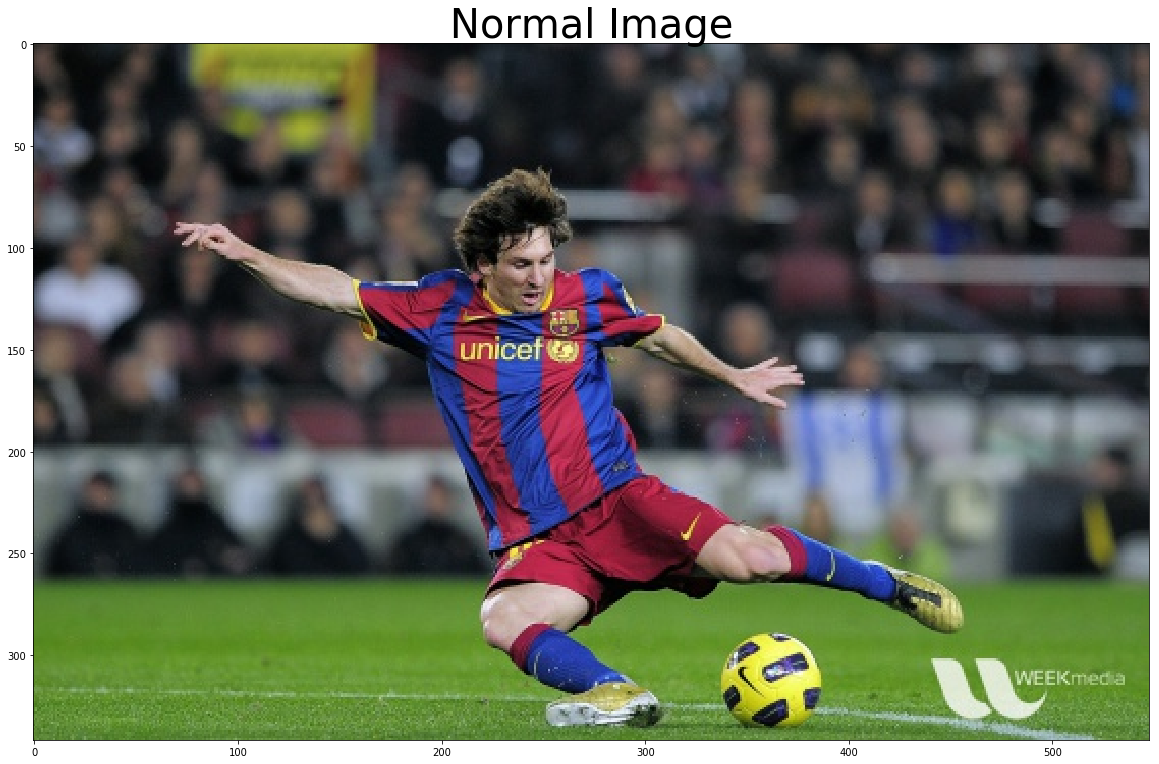

In [65]:
# Normal Image
image = cv2.imread('images/messi.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#image_rgb = image[:,:,::-1]
plt.figure(figsize = (20, 15))
plt.title('Normal Image', fontsize = 40)
plt.imshow(image_rgb)
print('Image Size' + str(image_rgb.shape))

Image Size(342, 548, 3)


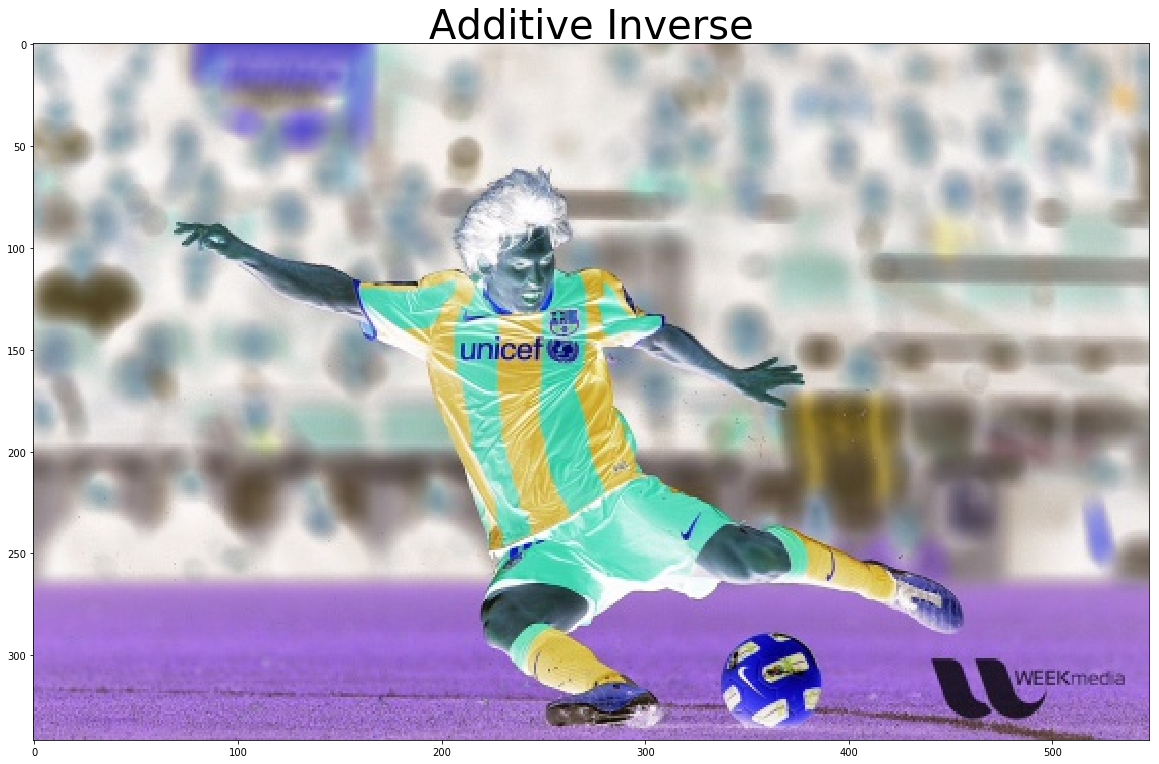

In [32]:
# Additive Inverse
plt.figure(figsize = (20, 15))
plt.title('Additive Inverse', fontsize = 40)
plt.imshow(255-image_rgb)
print('Image Size' + str(image_rgb.shape))

We can also scale the image by sclaing factor. in this case 0.5, in this way all the pixel intesity values will be divided by 2 and that will result in a darker image. If the image is multiplied by more than 1, like 1.5 the image will be brighter.

Image Size(342, 548, 3)


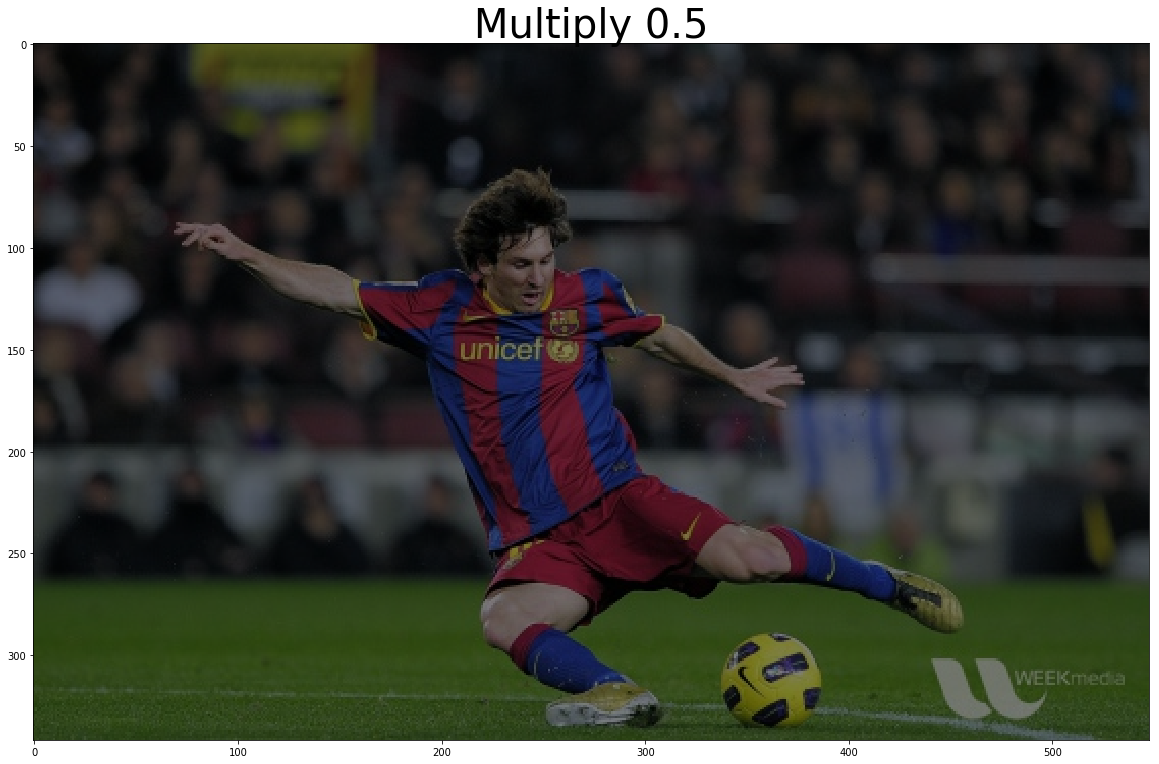

In [45]:
# Additive Inverse
plt.figure(figsize = (20, 15))
plt.title('Multiply 0.5', fontsize = 40)
# Convert values into integer and clip them between 0 and 255
plt.imshow(np.uint8(np.clip(0.5*image_rgb, 0 , 255)))
print('Image Size' + str(image_rgb.shape))

### 1.2 Image Channels
As we can see we can plot each channel separately. The are that are lighter (higher pixel intesity values) are the one of the selected channel. For example in the red image, the parts that are lighter are actually the red stripes of the t-shirt and the shorts of the player, since thei original color was red. The samw can applied for the other channels.

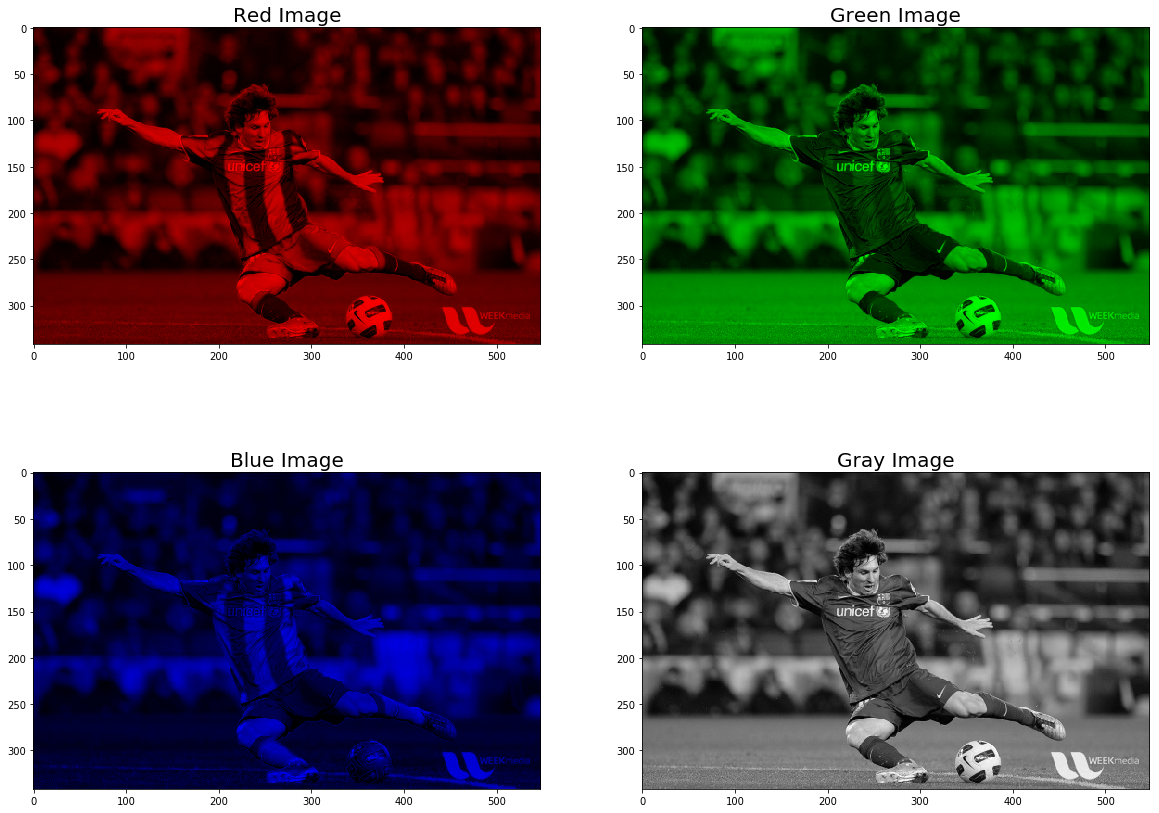

In [81]:
fig, ax = plt.subplots(2,2, figsize = (20,15))
img_red = image_rgb.copy()
img_red[:,:,1]=0
img_red[:,:,2]=0
img_green = image_rgb.copy()
img_green[:,:,0]=0
img_green[:,:,2]=0
img_blue = image_rgb.copy()
img_blue[:,:,0]=0
img_blue[:,:,1]=0
img_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
ax[0][0].set_title('Red Image', fontsize = 20)
ax[0][0].imshow(img_red, )
ax[0][1].set_title('Green Image', fontsize = 20)
ax[0][1].imshow(img_green)
ax[1][0].set_title('Blue Image', fontsize = 20)
ax[1][0].imshow(img_blue)
ax[1][1].set_title('Gray Image', fontsize = 20)
ax[1][1].imshow(img_gray, cmap=plt.cm.gray)

### 1.3 Blend Images
In order to combine the two images, they need to have the same size, since the addition is an element by element operation. We can do that by using `cv2.resize()`

Image Shape:(342, 548, 3)
Image Shape:(342, 548, 3)


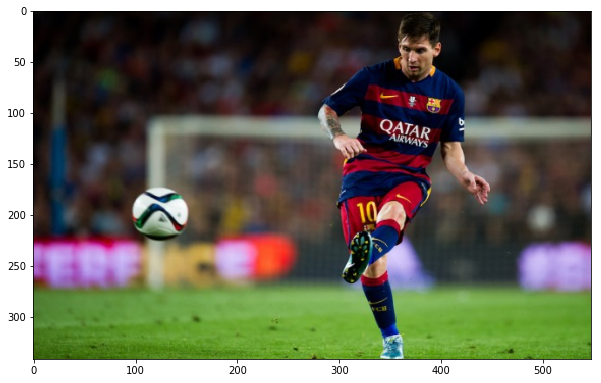

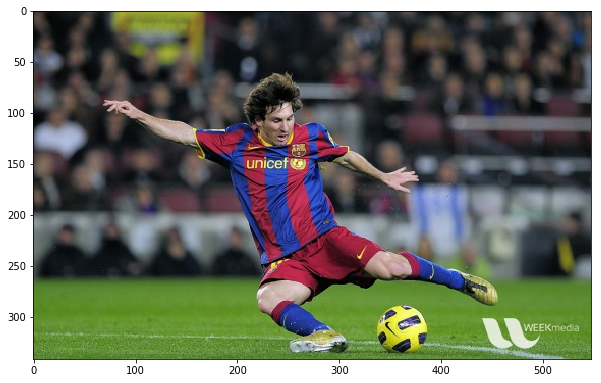

In [166]:
img2 = cv2.imread('images/messi2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (image_rgb.shape[1], image_rgb.shape[0]))
# Resize Image
plt.figure(figsize=(10,7))
print('Image Shape:' + str(img2.shape))
plt.imshow(img2)
plt.figure(figsize=(10,7))
print('Image Shape:' + str(image_rgb.shape))
plt.imshow(image_rgb)

In [167]:
img2[:,:,0]

array([[13, 14, 16, ..., 15, 15, 15],
       [11, 12, 14, ..., 16, 15, 15],
       [ 9, 10, 12, ..., 16, 16, 16],
       ...,
       [46, 52, 52, ..., 83, 76, 70],
       [49, 50, 49, ..., 74, 75, 78],
       [56, 55, 56, ..., 80, 81, 81]], dtype=uint8)

As we can see the result is bad beacause the pixels are sum together without any scale factor and they are clipped between 0 and 255. We can write a function to blend two image together and scaling their pixel intensity values by a specific sclae factor

In [98]:
def blend_images(img1, scale1, img2, scale2):
    blended_img = img1* scale1 + img2 * scale2
    return blended_img

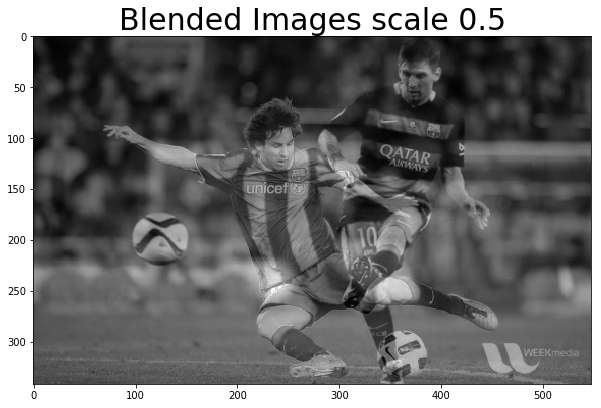

In [114]:
blended_img = blend_images(img2[:,:,0], 0.5, image_rgb[:,:,0], 0.5)
plt.figure(figsize=(10,7))
plt.title('Blended Images scale 0.5', fontsize = 30)
plt.imshow(np.clip(blended_img,0,255), cmap=plt.cm.gray)

If we change the scale factor we can see how the second image become more transparent.

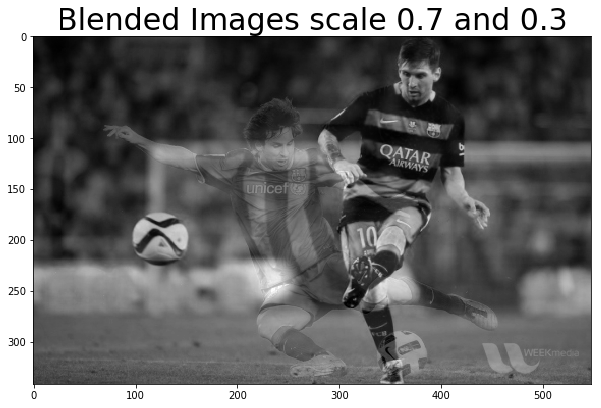

In [115]:
blended_img = blend_images(img2[:,:,0], 0.7, image_rgb[:,:,0], 0.3)
plt.figure(figsize=(10,7))
plt.title('Blended Images scale 0.7 and 0.3', fontsize = 30)
plt.imshow(np.clip(blended_img,0,255), cmap=plt.cm.gray)

#### Add Images

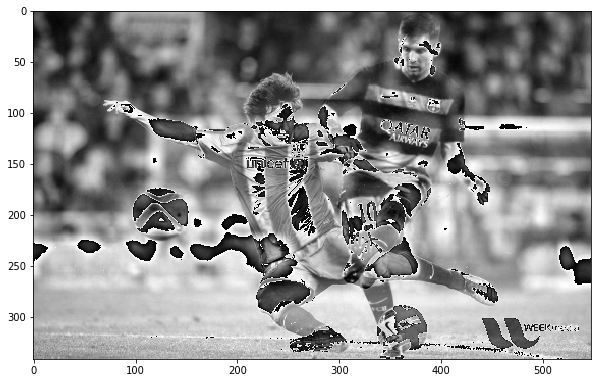

In [151]:
combined_image = img2[:,:,0] + image_rgb[:,:,0]
plt.figure(figsize=(10,7))
plt.imshow(np.clip(combined_image,0,255), cmap=plt.cm.gray)

#### Diiference between Images
The darker parts indicate whe the images differ the most

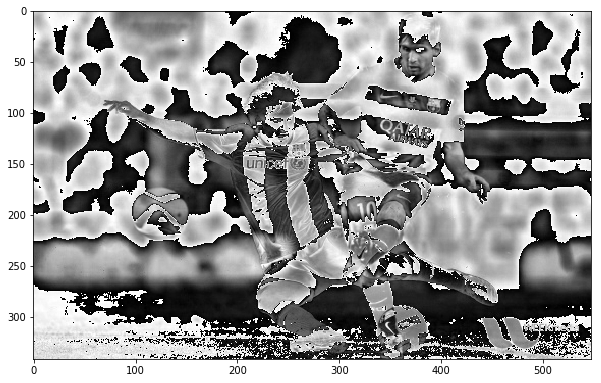

In [152]:
combined_image = img2[:,:,0] - image_rgb[:,:,0]
plt.figure(figsize=(10,7))
plt.imshow(np.clip(combined_image,0,255), cmap=plt.cm.gray)

In this case instead brighter areas show where the two images differ the most. So we can see that order matters

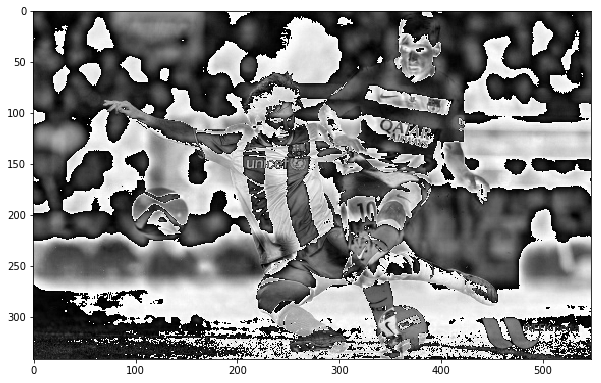

In [153]:
combined_image = image_rgb[:,:,0] - img2[:,:,0]
plt.figure(figsize=(10,7))
plt.imshow(np.clip(combined_image,0,255), cmap=plt.cm.gray)

Since we are interested in the magnitude of difference, we can do this: 

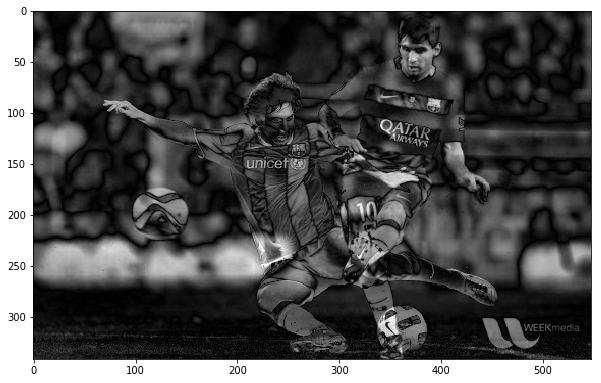

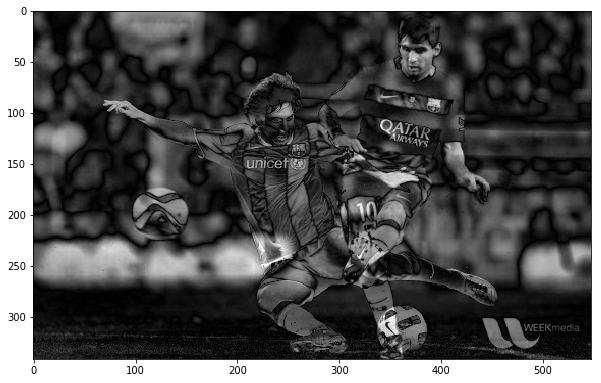

In [158]:
combined_image = np.uint8(abs(np.int16(image_rgb[:,:,0]) - np.int16(img2[:,:,0])))
combined_image2 = np.uint8(abs(np.int16(img2[:,:,0]) - np.int16(image_rgb[:,:,0])))
plt.figure(figsize=(10,7))
plt.imshow(np.clip(combined_image,0,255), cmap=plt.cm.gray)
plt.figure(figsize=(10,7))
plt.imshow(np.clip(combined_image2,0,255), cmap=plt.cm.gray)

As we can notice in this way the order doesn't matter.
A note on the image type:
Data type

Range:
- **uint8** : 0 to 255
    
- **uint16**: 0 to 65535

- **uint32**: 0 to 232 - 1

- **float**: -1 to 1 or 0 to 1
    
- **int8**: -128 to 127
    
- **int16**: -32768 to 32767
    
- **int32**: -2^31 to 2^-31

### 1.4 Noise
Noise in Image is another function that is combined with the original function to get a new guess function. Now we will show some basic Noise types and how they actually look when applied to images:

- **Salt and pepper noise**: random occuences of black and white pixels
- **Impulse noise**: random occurrences of white pixels
- **Gaussian noise**: variations in intensity drawn from a Gaussian normal distribution

#### Gaussian Noise

In [110]:
def gaussian_noise(mu, sigma, img):
    # Create a matrix with a random normal distribution 
    noise = np.random.normal(mu, sigma, img.shape)
    img = np.uint8(img + noise)
    return img

The higher the sigma the more noise we will have

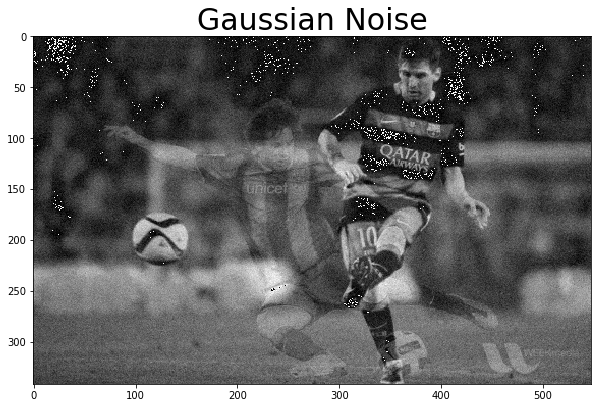

In [150]:
# Gaussian noise with mean 0 and std 10
img_gauss_noise = gaussian_noise(0,10, blended_img)
plt.figure(figsize=(10,7))
plt.title('Gaussian Noise', fontsize = 30)
plt.imshow(img_gauss_noise, cmap=plt.cm.gray)

#### Gaussian Filter (Gaussian Blur)
Gaussian blur (also known as Gaussian smoothing) is the result of blurring an image by a Gaussian function (named after mathematician and scientist Carl Friedrich Gauss). It is a widely used effect in graphics software, typically to reduce image noise and reduce detail. 

**Gaussian blur is a low-pass filter, attenuating high frequency signals.**

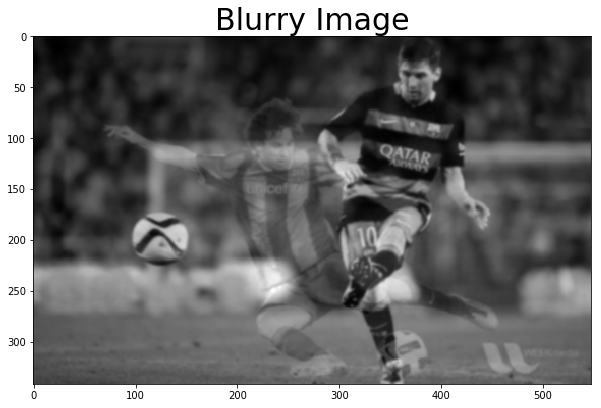

In [141]:
# you can also use gaussian filter function from scipy.
from scipy.ndimage import gaussian_filter
blurred = gaussian_filter(blended_img, sigma=1)
plt.figure(figsize=(10,7))
plt.title('Blurry Image', fontsize = 30)
plt.imshow(blurred, cmap=plt.cm.gray)

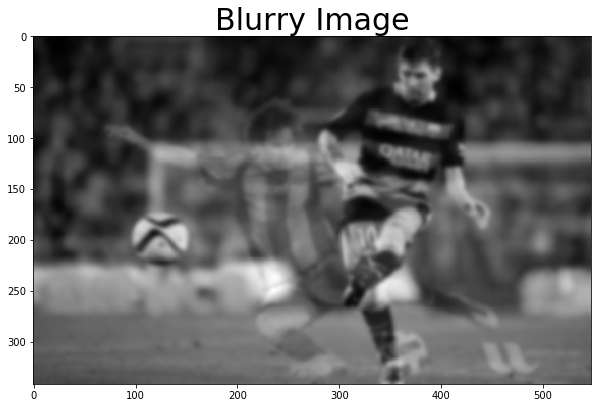

In [169]:
blurred = gaussian_filter(blended_img, sigma=2)
plt.figure(figsize=(10,7))
plt.title('Blurry Image', fontsize = 30)
plt.imshow(blurred, cmap=plt.cm.gray)

#### Salt & Pepper Noise

In [175]:
def add_salt_and_pepper(gb, prob):
    '''Adds "Salt & Pepper" noise to an image.
    Params:
    -------
            - gb: should be one-channel image with pixels in [0, 1] range
            - prob: probability (threshold) that controls level of noise
            
    Return:
    -------
            - noisy_img: image qwith added noise
    '''
    # Create a random noise with image shape
    rnd = np.random.rand(gb.shape[0], gb.shape[1])
    noisy = gb.copy()
    # Use a Threshold to give values 0 or 1 to rabdom generated values
    noisy[rnd < prob] = 0
    noisy[rnd > 1 - prob] = 1
    # Multiply back to 255 so the image is still uint8
    noisy_img = np.uint8(noisy*255)
    
    return noisy_img

Since salt and pepper is the random occurrence of black pixels (value equal to 0) and white pixels (value equal to 1), we need to provide an image with pixel intensity values in the range [0,1]. For this reason we divide the pixel intensity by 255, since the image is an unsigned int8 (values between 0 and 255)

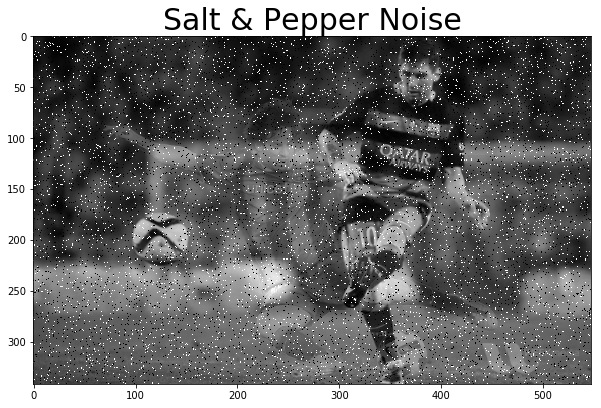

In [172]:
img_salt_pepper_noise = add_salt_and_pepper(blended_img/255, 0.03)
plt.figure(figsize=(10,7))
plt.title('Salt & Pepper Noise', fontsize = 30)
plt.imshow(img_salt_pepper_noise, cmap=plt.cm.gray)

In [182]:
def plot_images(imgs, index=None):
    rows = len(imgs)
    titles = ['Original Image', 'Gaussian Noise', 'Gaussian Filter(Blur)', 'Salt & Pepper Noise']
    f, axes = plt.subplots(nrows=rows, ncols=1, figsize=(15,10))
    for i, img in enumerate(imgs):
        y = img[index or 0, :]
        x = np.arange(len(y))
        axes[i].set_title(titles[i], fontsize = 20)
        axes[i].plot(x,y)
    plt.subplots_adjust(hspace = 0.5)

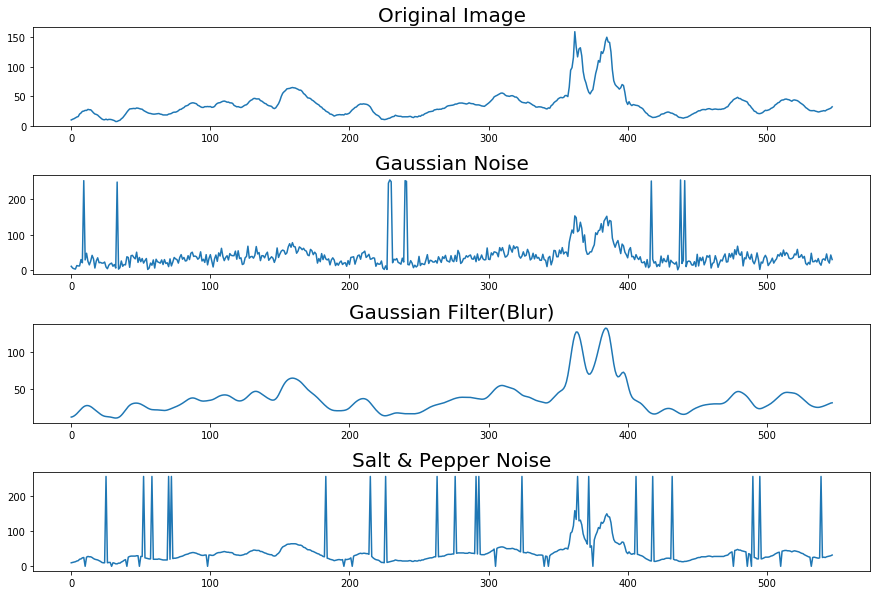

In [183]:
plot_images([blended_img,img_gauss_noise, blurred, img_salt_pepper_noise], 30)

From this fifgure we can notice the difference in the pixel intensity values on a single row of an image. As we can see in the original image the values are between 0 and ~160, since the image type is uint8 (values from 0 to 255). Then we add Gaussian Noise so we can clearly see the noise in the image. When we blur the image we do a low pass filter, so we smooth the curve. Finally in the last image we can see the salt and pepper noise, that corresponds to the picks of 0 and 255 that represents the white and black points of the image